In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mglearn
from IPython.display import display  

In [120]:
from sklearn.datasets import make_blobs, load_breast_cancer
bsc = load_breast_cancer()
features = [7, 22]

X = bsc.data[: 569, features]
y = bsc.target

# print(bsc.feature_names)
print("Shape of X: {}".format(X.shape))
print("Shape of y: {}".format(y.shape))

Shape of X: (569, 2)
Shape of y: (569,)


Text(0, 0.5, 'Feature 1')

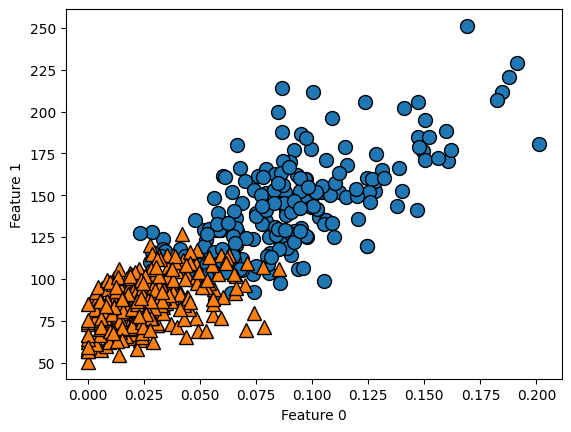

In [121]:



#X, y = make_blobs(centers = 4, random_state = 8)
#y = y % 2 

#print("Shape of X: {}".format(X.shape))
#print("Shape of y: {}".format(y.shape))
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

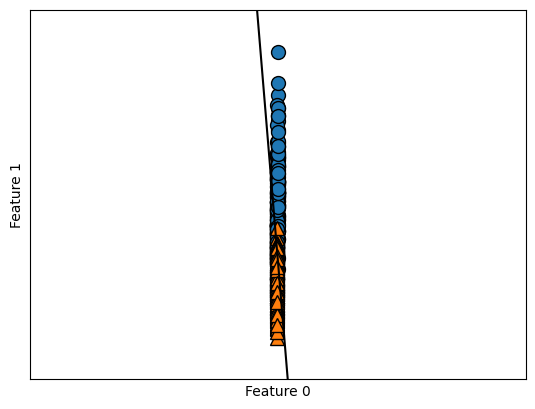

In [122]:
from sklearn.svm import LinearSVC

linear_svm = LinearSVC().fit(X, y)
mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [125]:
X_new = np.hstack([X, X[:, 1:] ** 2])
print(X_new.data[1:10])

In [126]:
# Adding a 3D representation of data

# add the squared second feature
X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d

figure = plt.figure()
# visualize in 3D
ax = Axes3D(figure, elev=-152, azim = -26)
# plot first all of the points with y == 0, then all with points y = 1
mask = y == 0
ax.scatter(
    X_new[mask, 0], X_new[mask, 1], X_new[mask, 2],
    c = 'b', cmap = mglearn.cm2, s = 60
)
ax.scatter(
    X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c= 'r', marker = '^',
    cmap = mglearn.cm2, s = 60
)

ax.set_xlabel("Feature0")
ax.set_ylabel("Feature1")
ax.set_zlabel("Feature1 ** 2")

C:\Users\DELL\AppData\Local\Temp\ipykernel_2060\884572792.py:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
C:\Users\DELL\AppData\Local\Temp\ipykernel_2060\884572792.py:17: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(


Text(0.5, 0, 'Feature1 ** 2')

<Figure size 640x480 with 0 Axes>

In [127]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# show linear decision boundary
figure = plt.figure()
ax = Axes3D(figure, elev = -152, azim = -26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride = 8, cstride = 8, alpha = 0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c = 'b',
           cmap = mglearn.cm2, s = 60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c = 'r', marker = '^',
           cmap = mglearn.cm2, s = 60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_label("feature1 ** 2")

C:\Users\DELL\AppData\Local\Temp\ipykernel_2060\901181408.py:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c = 'b',
C:\Users\DELL\AppData\Local\Temp\ipykernel_2060\901181408.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c = 'r', marker = '^',


<Figure size 640x480 with 0 Axes>

In [128]:
# The Kernel Trick
# This trick computes the distance, or the scalar products of distances between the
# variables inside the eucledian space, adding more and more variables does not
# increase the training speed, due to this mathematical trick.

Text(0, 0.5, 'Feature 1')

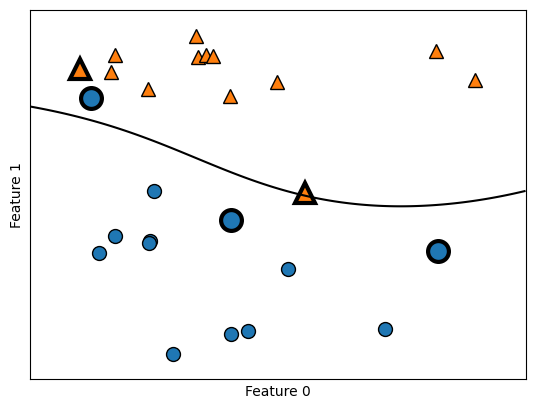

In [129]:
# We can use a polynomial kernel, or quadratic kernel.
from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C = 10, gamma = 0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps = .5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# plot support vectors
sv = svm.support_vectors_
# class labels of support vectors are given by the sign of the dual coefficients
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s = 15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

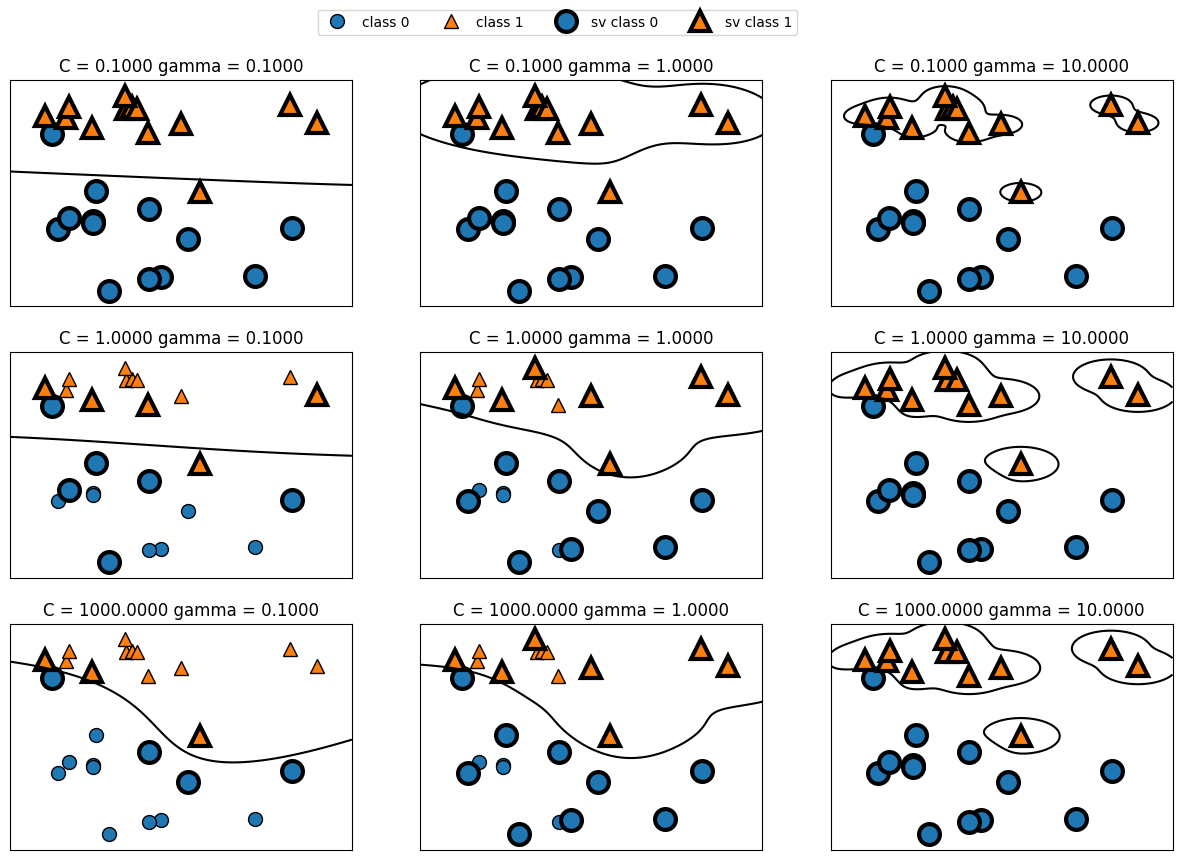

In [130]:
# Tuning SVM Parameters
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
    
axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"],
                 ncol=4, loc=(.9, 1.2))

In [138]:
from sklearn.model_selection import train_test_split
# Let's apply the RBF Kernel to the Breast Cancer Dataset
bsc_rbf = load_breast_cancer()

X = bsc_rbf.data
y = bsc_rbf.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

print(X.shape, y.shape)

print("Accuracy on train set: {: .3f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {: .3f}".format(svc.score(X_test, y_test)))

(569, 30) (569,)
Accuracy on train set:  0.904
Accuracy on test set:  0.937


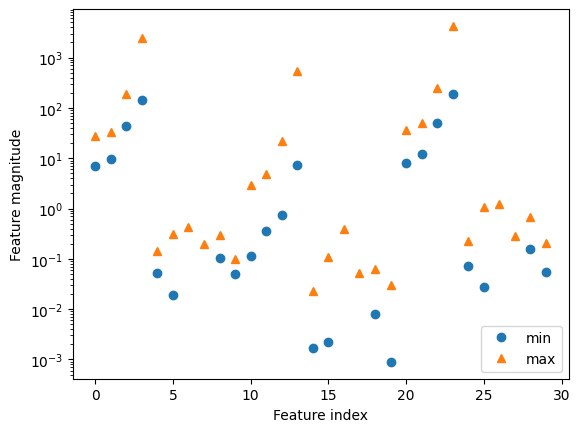

In [139]:
plt.plot(X_train.min(axis=0), 'o', label="min")
plt.plot(X_train.max(axis=0), '^', label="max")
plt.legend(loc=4)
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")
plt.yscale("log")

In [141]:
# Preprocessing data for SVMs

# compute the minimum value per feature on the training set
min_on_training = X_train.min(axis=0)
# compute the range of each feature (max - min) on the training set
range_on_training = (X_train - min_on_training).max(axis=0)

# subtract the min, and divide by range
# afterward, min = 0, and max=1 for each feature
X_train_scaled =(X_train - min_on_training) / range_on_training
print("Minimum for each feature: \n{}".format(X_train_scaled.min(axis=0)))
print("Maximum for each feature: \n{}".format(X_train_scaled.max(axis=0)))

Minimum for each feature: 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum for each feature: 
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [142]:
# use the same transformation on the test set
# using min and range on the training set
X_test_scaled = (X_test - min_on_training) / range_on_training


In [ ]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

print("Accuracy on the training set: {: .4f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on the test set: {: .4f}".format(svc.score(X_test_scaled, y_test)))

# The performance of this model is quite nice, scaling made a huge imporvement.
# From here we can increase C, or gamma component to fit a more complex model

Accuracy on the training set:  0.9836
Accuracy on the test set:  0.9720


In [ ]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print("Accuracy on the training set: {: .4f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on the test set: {: .4f}".format(svc.score(X_test_scaled, y_test)))

# The performance of the model is worse with an increased gamma.
# I am sure that we can run CV or make a function to test multiple C's to find out which
# one is the best gamma.

Accuracy on the training set:  1.0000
Accuracy on the test set:  0.9580
